# Arc
<a name="readme-top"></a>

This repository contains the artifact for the USENIX 2024 submission ["Holding Secrets Accountable: Auditing Privacy-Preserving Machine Learning"](https://arxiv.org/abs/2402.15780).

<!-- ABOUT THE PROJECT -->
## Abstract
In this work, we introduce Arc, an MPC framework designed
for auditing privacy-preserving machine learning. 
Arc cryptographically ties together MPC training, inference, and auditing
phases to allow robust and private auditing. 
At the core of our framework is a new protocol for efficiently verifying inputs
against succinct commitments, ensuring the integrity of the training data, model and prediction samples across phases. 
We evaluate the performance
of our framework when instantiated with our consistency protocol and compare it to hashing-based and homomorphic commitment-based approaches, demonstrating that it is up to
10^4× faster and up to 10^6× more concise.


## Description & Requirements
The artifact is a prototype implementation of the Arc framework.
The prototype is designed to focus on evaluating the overheads of input consistency protocols for MPC computations.
The framework uses the MPC implementation of MP-SPDZ, a research framework execute MPC programs with different protocols. 
Arc extends the MPC protocols in MP-SPDZ with the ability to check that MPC inputs are consistent with a commitment through a novel consistency check protocol.

This repository is structured as follows.

### Arc Components
- [MPC auditing functions](scripts) 
Implementations of several auditing functions (in addition to ML training and inference) in [MP-SPDZ's](MP-SPDZ) DSL.

- [MPC consistency utils](script_utils)
A helper library with 1) functionality to load the correct datasets and models for auditing and 2) to compute the correct metadata for the inputs and outputs to run the consistency check protocol on.

- [Consistency check protocol](mpc-consistency) The code for the consistency check protocol based on polynomial commitments.
This component uses Arkworks' poly_commit library and is implemented in Rust.

- [Share conversion and efficient EC-MPC scripts](https://github.com/pps-lab/MP-SPDZ/tree/85c3c7e65bb7759c96ef540cca96f6a7163d3568) 
Our framework adds functionality to MP-SPDZ for share conversion and efficient EC-MPC operations, which
are implemented as lower-level MP-SPDZ scripts.

### Arc Benchmarks & Evaluation
- [DoE-Suite](https://github.com/nicolas-kuechler/doe-suite) The evaluation is built using the [DoE-Suite](https://github.com/nicolas-kuechler/doe-suite), which allows
straightforward reproducibility of results by defining experiments in a configuration file (_suite_) and executing them on a set of machines.
We provide the necessary DoE-Suite commands to reproduce all results. 
However, it is also possible to obtain the individual commands used to invoke the framework and run them manually.
- [Utils](utils/python_utils) [Experiment runner](utils/python_utils/scripts/experiment_runner.py) utility that ties together the MPC computation, the share conversion and the consistency protocols.
This script is the entrypoint for the remote servers when running the experiment and reads the experiment instance config file
created by doe-suite for each experiment.

  
### Security, privacy, and ethical concerns
There are no concerns when running this artifact locally.
Please note that executing experiments on your AWS infrastructure involves the creation of multiple EC2 instances, resulting in associated costs.
Please manually check that any created machines are terminated afterward.


### How to access
The artifact can be accessed at [https://github.com/pps-lab/arc/tree/ae_1](https://github.com/pps-lab/arc/tree/ae_1)

### Hardware dependencies
None

### Software dependencies
No private software is required for this artifact.

This artifact has been tested on Ubuntu and MacOS.
The artifact relies on DoE-Suite to install all necessary dependencies on the end-to-end servers.
To run DoE-Suite, we require Python 3.9, Poetry, AWS CLI and Make to be installed, which are also highlighted in the installation instructions below. 
The framework uses Poetry to manage further Python dependencies. 
The sub-components require additional dependencies, which must be installed manually if you wish to run these components locally (without DoE-Suite). 
In particular, [mpc-consistency](mpc-consistency) requires Rust to be installed.

### Benchmarks
No proprietary benchmarks and public datasets are automatically loaded by the build scripts.



## Set-up
We provide a `make` command to run a [JupyterLab environment](artifact.ipynb) to run the experiments and evaluate the artifact.
This should ensure that the environment is set up correctly and that the necessary dependencies are installed.



### Installation
We require Python, Poetry and Make to be installed to run the artifact.
To get a local copy up and running follow these steps.

1. Local clone of the repository (**with submodules!**)
    ```sh
    git clone --recurse-submodules git@github.com:pps-lab/arc.git
    ```
   
2. Install [Python Poetry](https://python-poetry.org/)
    ```sh
    curl -sSL https://install.python-poetry.org | python3 -
    ```

3. Install [Make](https://www.gnu.org/software/make/)

4. Install [Install AWS CLI version 2](https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html) (to run remote experiments on AWS)

#### Environment Variables
The [doe-suite](https://github.com/nicolas-kuechler/doe-suite/) requires a few environment variables and should handle
the rest of the configuration automatically (including for the Jupyter notebook) using relative paths and poetry.

Setup environment variables for the Doe-Suite:
 ```sh
 # root project directory (expects the doe-suite-config dir in this folder)
 export DOES_PROJECT_DIR=<PATH>

 #  Your unique short name, such as your organization's acronym or your initials.
 export DOES_PROJECT_ID_SUFFIX=ae
 ```

For AWS EC2:
 ```sh
 export DOES_CLOUD=aws

 # name of ssh key used for setting up access to aws machines (name of key not path)
 export DOES_SSH_KEY_NAME=id_ec_arc
 ```
 `DOES_SSH_KEY_NAME` refers to the key the reviewers have received through artifact evaluation system, for more info see below.

> Tip: To make it easier to manage project-specific environment variables, you can use a tool like [Direnv](https://direnv.net/docs/installation.html). Direnv allows you to create project-specific .envrc files that set environment variables when you enter the project directory.
With Direnv, the below environment variables would be set in [doe-suite/.envrc](doe-suite/.envrc)


#### Setting up AWS
Authentication details can be found in the Artifact submission system. This will allow the Artifact reviewers to run the evaluation on the same resources stated in the paper submission. The experiments on AWS are automated with DoE-Suite and can be called from the JupyterLab environment.

Reviewers should have received a private key: `id_ec_arc` and AWS credentials
1. Move the provided private key `id_ec_arc` to the `.ssh` folder of your home directory (reviewers should have received the key, otherwise contact us).
   Ensure the id_ec_arc key has the correct permissions:
   ```shell
   chmod 600 ~/.ssh/id_ec_arc
   ```

2. Configure AWS credentials using `aws configure`.
   The credentials can be found in the `arc_ac_accessKeys.txt`.
   Set `eu-central-1` as the default region.
   By default, credentials should be stored in ``~/.aws/credentials``.

3. To configure SSH access to AWS EC2 instances, you need to add a section to your ``~/.ssh/config`` file:
   ```
   Host ec2*
      IdentityFile ~/.ssh/id_ec_arc
      User ubuntu
      ForwardAgent yes
      StrictHostKeyChecking no
      UserKnownHostsFile=/dev/null
   ```

For more details on the installation of doe-suite please refer to the [doe-suite documentation](https://nicolas-kuechler.github.io/doe-suite/installation.html#base-installation)
and [AWS-specific instructions](https://nicolas-kuechler.github.io/doe-suite/installation.html#aws-specific).


#### Running JupyterLab
From this point on it is possible to run the Jupyter notebook which contains the experiments and evaluation of the artifact.
To launch the Jupyter notebook in the environment with the correct dependencies, we provide a make command.
1. Navigate to the `doe-suite` sub-directory and run `make jupyter` which will launch these instructions in the form of a notebook.
```shell
cd doe-suite
make jupyter
```
2. Run the below cell to check that it prints `Environment loaded successfully`.

In [1]:
import sys
import os
from ipywidgets import widgets, Layout, HBox, HTML
from IPython.display import display, Markdown, HTML, clear_output

%load_ext autoreload
%autoreload 2

path = os.path.abspath(".")

print(f"Project: {path}")

%env DOES_PROJECT_DIR=$path
%env DOES_PROJECT_ID_SUFFIX=ae

does_config_path = os.path.join(os.environ["DOES_PROJECT_DIR"], "doe-suite-config")

path = os.path.join(does_config_path, "does_etl_custom")
sys.path.append(path)

import doespy.etl.etl_base as etl_base

# inspect df
if etl_base.ETL_CUSTOM_PACKAGE == "does":
    print("Environment loaded successfully")

Project: /Users/hidde/PhD/auditing/arc
env: DOES_PROJECT_DIR=/Users/hidde/PhD/auditing/arc
env: DOES_PROJECT_ID_SUFFIX=ae
Environment loaded successfully




If you see any errors, make sure the correct environment variables are set.

Our JupyterLab environment contains further documentation, runnable code cells to run benchmarks locally or on AWS (using `!` to run shell commands), and runnable code cells to recreate the plots from the paper.

To execute a selected cell, either click on the run button in the toolbar or use `Ctrl + Enter`. To keep the JupyterLab readable, cells containing longer code sections to create plots are initially collapsed (indicated by three dots). However, by clicking on the dots, the cell containing the code expands (`View/Collapse Selected Code` to collapse the code again).

**Please ensure that the AWS resources are cleaned up if they are not used in the artifact**
If the playbook terminates normally (i.e., without error and is not interrupted), then the playbook ensures that the created resources are also cleaned up.
When in doubt, please run the `make clean-cloud` with the command below or contact the authors to avoid unnecessary costs.


In [2]:
%%time
# Uncomment and run to terminate all resources on AWS (in case of an error, try to repeat and otherwise contact the authors) 

# !cd doe-suite && make clean-cloud

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


### Basic Test (AWS, 30 minutes)
To test that your local machine is configured properly and that you have access to the AWS resources, you can run the following command (with `doe-suite` as working directory):


In [3]:
# Copy this command in a separate terminal window in the doe-suite directory:
# make run suite=audit_fairness id=new

# or uncomment to run
# !cd doe-suite && make run suite=audit_fairness id=new

which will launch two sets of servers on AWS to reproduce the fairness experiments (Fig. 6, column 1). The command will run the experiments, fetch the results and store them in the `doe-suite-results` folder.
> Tip: To debug problems it can be helpful to comment out the line `stdout_callback = community.general.selective` in [doe-suite/ansible.cfg](../doe-suite/ansible.cfg).


### Basic Test (Local, 15 minutes)
We also provide a `Makefile` in the project's root directory to run scripts locally.
For this, we require MP-SPDZ dependencies to be installed, which can be summarized as the following:

In [4]:
# Ubuntu (this might try show some prompts, so its good to run this in a real terminal window)
# !sudo apt-get install -y automake build-essential clang cmake git libboost-dev libboost-iostreams-dev libboost-thread-dev libgmp-dev libntl-dev libsodium-dev libssl-dev libtool python3 libomp-dev libboost-filesystem-dev

# MacOS
# !brew install openssl boost libsodium gmp yasm ntl cmake libomp

This should install all dependencies necessary for local execution, including the dependencies of MP-SPDZ.
We refer to the [MP-SPDZ documentation](https://github.com/data61/MP-SPDZ?tab=readme-ov-file#tldr-source-distribution) for more details on those dependencies.

To install the framework's dependencies in the project directory, run:

In [ ]:
# in DOES_PROJECT_DIR
!make install

Note: If you encounter `ld: library not found for -lomp` from the linker, it may help to add the following to `MP-SPDZ/CONFIG.mine`
```
# These were tested for MacOS
MY_CFLAGS += -I/usr/local/opt/openssl/include -I/opt/homebrew/opt/openssl/include -I/opt/homebrew/include -I/usr/local/opt/libomp/include
MY_LDLIBS += -L/usr/local/opt/openssl/lib -L/opt/homebrew/lib -L/opt/homebrew/opt/openssl/lib -L/usr/local/opt/libomp/lib
```
**Datasets** You must store the relevant datasets in the `MP-SPDZ/Player-Data` directory.
We provide the datasets from the paper, preprocessed to work with MP-SPDZ,
in a public s3 bucket at `http://arc-mpspdz-data.s3.amazonaws.com/{DATASET_NAME}.zip`.
Available datasets are: `adult_3p`, `mnist_full_3party`, `cifar_alexnet_3party`.
For the QNLI dataset, the identifier is `glue_qnli_bert` but the data will be loaded by the compilation script so there is no need to download it.


In [ ]:
!mkdir MP-SPDZ/Player-Data

for dataset in ['adult_3p']: #, 'mnist_full_3party', 'cifar_alexnet_3party']:
    !wget http://arc-mpspdz-data.s3.amazonaws.com/{dataset}.zip -O {dataset}.zip
    !unzip -o {dataset}.zip -d MP-SPDZ/Player-Data/{dataset}

Then run one of the tasks with the following command:


In [ ]:
!poetry run make ring script=inference dataset=adult_3p

The framework will compile the script, compile the MP-SPDZ binaries (which will take several minutes) and then run the script.
<details>
<summary>Expected Output (last 10 lines)</summary>

```
Time = 0.013872 seconds 
Time97 = 0.000278 seconds (0 MB, 0 rounds)
Time98 = 1e-06 seconds (0 MB, 0 rounds)
Time99 = 0.000659 seconds (0.023816 MB, 3 rounds)
Time101 = 0.012051 seconds (0.011441 MB, 148 rounds)
Data sent = 0.035257 MB in ~151 rounds (party 0 only; use '-v' for more details)
Global data sent = 0.058875 MB (all parties)
This program might benefit from some protocol options.
Consider adding the following at the beginning of your code:
        program.use_trunc_pr = True
```
</details>

## Evaluation Workflow

We assume that the following steps are followed within the JupyterLab environment.
This artifact relies on the [DoE-Suite](https://github.com/nicolas-kuechler/doe-suite) to manage experiment configurations,
orchestrate the execution of experiments, collect the results and post-process them into tables and plots.

The doe-suite can be run using a set of commands defined in a [Makefile](doe-suite/Makefile) in the `doe-suite` directory that invoke Ansible.
Use `make run` to run experiments, from now on referred to as _suites_, that are defined in the [doe-suite-config/designs](doe-suite-config/designs) directory.
Results of these experiments are then combined together into plots that are defined in the [doe-suite-config/super_etl](doe-suite-config/super_etl) directory.

For each result shown in the paper, we have a separate section that contains:

1. Code to create and display the plot shown in the paper and corresponding dataframe based on the output files from the benchmarks (stored in `doe-suite-results-cameraready`).
   These files can be downloaded from this polybox:

In [ ]:
!wget https://polybox.ethz.ch/index.php/s/U6mfbqch0pmSg9U/download -O doe-suite-results-cameraready.zip
!unzip -o doe-suite-results-cameraready.zip -d .

2. The command to reproduce the results on AWS. You can uncomment the command and run the cell with Ctrl + Enter.
   Due to the large amount of output and long running time, we recommend to run these commands in a separate terminal window.
   The results from these experiments will be stored in `doe-suite-results` and will appear in a separate set of plots in the notebook.

   **Note that the shell commands to execute benchmarks are by default commented out. Uncomment to initiate the runs for these benchmarks.** (remove `#` before or `"""` enclosing the shell command)

   JupyterLab code cells are blocking which means that when executing a cell (e.g., run a benchmark), we cannot run another cell until the previous cell finished. As a result, it might be to better for long running commands to copy the shell command (excluding the comment and !) and execute it in a Jupyter terminal.

   Finally, while running a benchmark in a cell or a terminal, keep the JupyterLab session open and ensure that the internet connection is stable (for AWS).



In [17]:
display(HTML(' <a href="", data-commandlinker-command="terminal:create-new" >Open new Terminal</a>'))
display("(Opens in `doe-suite-config` directory; commands for doe-suite must be run in the `doe-suite` directory, please run `cd ../doe-suite` in this terminal window)")

'(Opens in `doe-suite-config` directory; commands for doe-suite must be run in the `doe-suite` directory, please run `cd ../doe-suite` in this terminal window)'


### Major Claims
- **(C1)**: Arc instantiated with our consistency protocol is up to 10^4x faster and 10^6x more concise than hashing-based (SHA3) and homomorphic commitment-based (PED) approaches.
- **(C2)**: Across all settings, Arc significantly outperforms related approaches in terms of runtime, with a storage overhead comparable to the hash-based approach.

Both claims are proven by the experiments in Section 6: **Training** (E1, Fig. 4), **Inference** (E2, Fig. 5) and **Auditing** (E3, Fig. 6).

### Experiments

For each of training, inference and auditing, we provide a table of suites that belong to this setting.
Each row contains a rough estimate of the maximum duration of running that suite.
This estimate is based on the raw runtimes in the benchmark logs, but the estimation of the overhead of creating and provisioning the machines may not be completely accurate.
To run a suite, simply select a suite from the table and invoke doe-suite to run it.
We provide an option to run the suite inline, or in a separate terminal window.
> Note: The experiments in the WAN setting are particularly time-consuming. As the only difference between the LAN and WAN settings is the network latency (configured using `tc`),
we recommend running the LAN version of the suites if the goal is to verify the framework's functionality.

> Note: There is a small chance an experiment gets stuck. If the experiment is stuck longer than the estimated time (also indicated by the machines have low CPU and network utilization), please terminate the experiment and try again.

> Note: The machine orchestrating the experiments continuously checks if experiments are still running on the remote servers.
> Should this lose internet connection, it is possible to resume an existing experiment using `make run suite=<<SUITE_NAME>> id=<<ID>>` where `<<ID>>` refers the experiment id or `last` for the most recent experiment of the suite.

### Helper files
Please run these cells to ensure that the helper functions to plot the results are loaded.

In [15]:
from doespy.etl.etl_debug import debug_compute_input_df, debug_super_etl_step, HDict
from does_etl_custom.etl.bar_plot_loader import BarPlotLoader
from does_etl_custom.etl.sp import ActualDurationLoader

def select_exp(exp_list):
    w = widgets.Dropdown(
        options=exp_list,
        value=exp_list[0],
        description='Experiment:',
        disabled=False,
    )
    display(Markdown("### Available experiments"))
    display(w)
    return w

def set_result_path(source):
    if source == "paper":
        path = os.environ['DOES_PROJECT_DIR'] + "/doe-suite-results-cameraready"
    elif source == "aws":
        path = os.environ['DOES_PROJECT_DIR'] + "/doe-suite-results"
    else:
        raise ValueError(f"Source {source} invalid.")
    %env DOES_RESULTS_DIR=$path

In [3]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import Javascript
from time import time

def compute_suite_id_map_available():
    results_dir = os.path.join(os.environ['DOES_PROJECT_DIR'], os.environ['DOES_RESULTS_DIR'])
    suites = os.listdir(results_dir)
    suite_split = [x.rsplit("_", 1) for x in suites]
    
    # Filter out invalid entries
    suite_split = [elem for elem in suite_split if len(elem) == 2 and elem[1].isdigit()]
    
    # Keep the most recent
    d = {}
    for suite, idx in suite_split:
        idx = int(idx)
        if suite not in d or idx > d[suite]:
            d[suite] = idx
    
    return HDict(d)

def output(source, super_etl, pipeline, StepCls=BarPlotLoader):
    
    set_result_path(source.lower())
    display(Markdown(f"#### >> {source} Results"))
        
    if source.lower() == "paper":
        overwrite_suite_id_map = None
    else:
        overwrite_suite_id_map = compute_suite_id_map_available()

    debug_compute_input_df.cache_clear()
    df = debug_compute_input_df(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls, overwrite_suite_id_map=overwrite_suite_id_map)

    if not df.empty:
        res = debug_super_etl_step(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls, df=df)
        plt.show()
        display(df)    
    else:
        display(Markdown("> **does not exist yet**"))
    
    display(Markdown("---"))

def copy_text_button(command: str) -> widgets.Widget:
    button = widgets.Button(description=f"Copy Command", icon="copy")
    output = widgets.Output(layout=widgets.Layout(display="none"))
    copy_js = Javascript(f"navigator.clipboard.writeText({json.dumps(command)})")
    
    def on_click(_: widgets.Button) -> None:
        output.clear_output()
        output.append_display_data(copy_js)
    button.on_click(on_click)
    
    print(f"Experiment command (run in doe-suite dir): `{command}`")
    display(widgets.Box((button, output)))


### Storage
At this point we also copy the storage.csv from the camera-ready benchmarking files to the AWS results folder for convenience.
This file contains the storage costs for the client for the different consistency protocols for the training and inference phases.
The storage.csv can be recomputed using [notebooks/storage.ipynb](notebooks/storage.ipynb).

In [ ]:
!mkdir -p doe-suite-results
!cp doe-suite-results-cameraready/storage.csv doe-suite-results/storage.csv

**Output Verbosity**

In [ ]:
# Enable for more verbose log output, disabled by default for conciceness
# import logging
# logging.basicConfig(level=logging.INFO)


### Training
The training experiments use the MP-SPDZ training script defined in [training.mpc](scripts/training.mpc) which loads the input, trains the model and then outputs it
while ensuring the correct metadata is output for the consistency scripts.
The results are postprocessed using the ETL pipeline defined in [train.yml](doe-suite-config/super_etl/train.yml).

<details>
<summary>Available Suites</summary>

| Suite                                                                 | Description                                  | Est. Duration |
|-----------------------------------------------------------------------|----------------------------------------------|---------------|
| [train_3pc](doe-suite-config/designs/train_3pc.yml)                   | Training for Adult, MNIST and CIFAR-10 (LAN) | 8h            |
| [train_3pc_wan](doe-suite-config/designs/train_3pc_wan.yml)           | Training for Adult, MNIST and CIFAR-10 (WAN) | 14h           |
| [train_3pc_bert](doe-suite-config/designs/train_3pc_bert.yml)         | Training for QNLI (LAN)                      | 8h            |
| [train_3pc_bert_wan](doe-suite-config/designs/train_3pc_bert_wan.yml) | Training for QNLI (WAN)                      | 8h            |

</details>

In [ ]:
suite_id = int(time())
suite_name="<<SUITE_NAME>>"

# Uncomment to run inline
# !cd doe-suite-config && ansible-playbook ../doe-suite/src/experiment-suite.yml -e "suite={suite_name} id=new epoch={suite_id} expfilter=sh"
# clear_output()
# print("Output cleared for conciceness")

copy_text_button(f"make run suite={suite_name} id=new")

### Plots

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready
/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready


#### >> Paper Results

Filtering our pipelines: {'table', 'raw', 'mnist'}


processing runs of experiment wan_sh: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.25it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['training'], 'suite_name': ['train_3pc', 'train_3pc_wan', 'train_3pc_bert', 'train_3pc_bert_wan'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'network_type': ['lan', 'wan'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'mpc.script_args.dataset': ['adult', 'cifar_alexnet', 'glue_qnli_bert'], 'mpc.domain': ['ring']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'mpc.domain', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'group_labels': {'cols': ['consistency_args.type'], 'format': '{}'}, 'show_debug_info': False, 'figure_size': [2.5, 1.8], 'bar_width': 1, 'legend_fig': {'format': '{} {}', 'cols': ['mpc_type', '$bar_part_col$'], 'kwargs': {'loc': 'upper center', 'ncol': 4, 'bbox_to_anchor': [0.51, 0.075], 'columnspacing': 3.5, 'fancybox': Tr

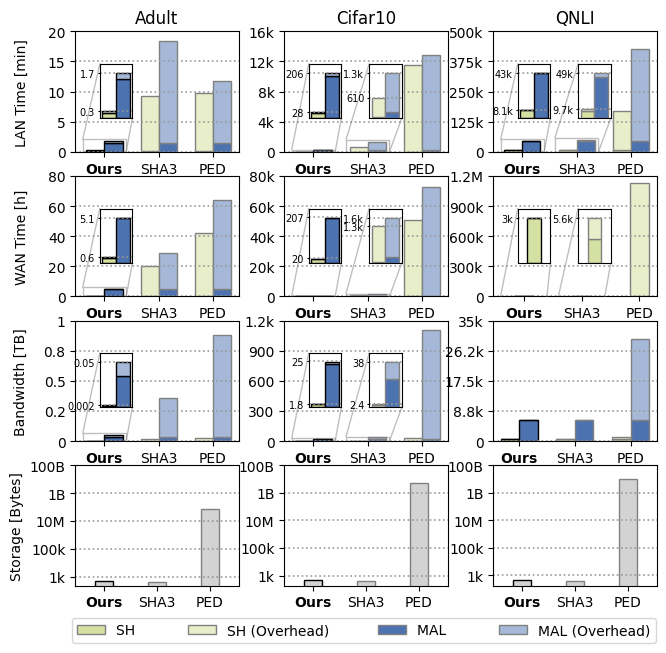

,suite_name,exp_name,run,host_idx,mpc.script_name,mpc.domain,mpc.script_args.dataset,mpc_type,network_type,consistency_args.type,...,signature_train,signature_modelowner,signature_computer_train,signature_computer_inference,identity_train,identity_modelowner,identity_computer_train,identity_computer_inference,storage_train,storage_inference
0,train_3pc,mal,1,0,training,ring,adult,mal,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
1,train_3pc,mal,1,1,training,ring,adult,mal,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
2,train_3pc,mal,1,2,training,ring,adult,mal,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
3,train_3pc,sh,1,0,training,ring,adult,sh,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
4,train_3pc,sh,1,1,training,ring,adult,sh,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,train_3pc_bert,sh,5,1,training,ring,glue_qnli_bert,sh,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
131,train_3pc_bert,sh,5,2,training,ring,glue_qnli_bert,sh,lan,sha3s,...,192,64,64,64,96,32,96,96,416,608
132,train_3pc_bert_wan,wan_sh,1,0,training,ring,glue_qnli_bert,sh,wan,sha3s,...,192,64,64,64,96,32,96,96,416,608
133,train_3pc_bert_wan,wan_sh,1,1,training,ring,glue_qnli_bert,sh,wan,sha3s,...,192,64,64,64,96,32,96,96,416,608


---

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results
/Users/hidde/PhD/auditing/arc/doe-suite-results


#### >> AWS Results

Replacing suite id map in super etl design: {'audit_fairness': 1723128427}
Filtering our pipelines: {'table', 'raw', 'mnist'}


/Users/hidde/PhD/auditing/arc/doe-suite/doespy/doespy/etl/etl_base.py:180: UserWarning: skip executing pipeline=compare_relatedwork_linear because no experiment data available
  warnings.warn(f"skip executing pipeline={pipeline_name} because no experiment data available")


> **does not exist yet**

---

In [16]:

for source in ["Paper","AWS"]:
    output(source, "train", "compare_relatedwork_linear")
    


### Inference
The inference experiments use the MP-SPDZ inference script defined in [inference.mpc](scripts/inference.mpc).
The results are postprocessed using the ETL pipeline defined in [inference.yml](doe-suite-config/super_etl/inference.yml).

<details>
    <summary>Available Suites</summary>

| Suite                                                                         | Description                                                        | Est. Duration |
|-------------------------------------------------------------------------------|--------------------------------------------------------------------|------------|
| [inference_3pc](doe-suite-config/designs/inference_3pc.yml)                   | Inference for Adult, MNIST and CIFAR-10 (LAN)                      | 2h         |
| [inference_3pc_wan](doe-suite-config/designs/inference_3pc_wan.yml)           | Inference for Adult, MNIST and CIFAR-10 (WAN)                      | 6h30m      |
| [inference_3pc_bert](doe-suite-config/designs/inference_3pc_bert.yml)         | Inference for QNLI (LAN)                                           | 3h         |
| [inference_3pc_bert_wan](doe-suite-config/designs/inference_3pc_bert_wan.yml) | Inference for QNLI (WAN)                                           | 6h         |

</details>


In [11]:
suite_id = int(time())
suite_name="<<SUITE_NAME>>"

# Uncomment to run inline
# !cd doe-suite-config && ansible-playbook ../doe-suite/src/experiment-suite.yml -e "suite={suite_name} id=new epoch={suite_id} expfilter=sh"
# clear_output()
# print("Output cleared for conciceness")

copy_text_button(f"make run suite={suite_name} id=new")

Experiment command (run in doe-suite dir): `make run suite=<<SUITE_NAME>> id=new`


Box(children=(Button(description='Copy Command', icon='copy', style=ButtonStyle()), Output(layout=Layout(displ…

### Plots

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready
/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready


#### >> Paper Results

Filtering our pipelines: {'raw', 'mnist'}


processing runs of experiment wan: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 22.34it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['inference'], 'suite_name': ['inference_3pc', 'inference_3pc_wan', 'inference_3pc_bert', 'inference_3pc_bert_wan'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'network_type': ['lan', 'wan'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc.script_args.dataset': ['adult', 'cifar_alexnet', 'glue_qnli_bert']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'legend_fig': {'format': '{} {}', 'cols': ['mpc_type', '$bar_part_col$'], 'kwargs': {'loc': 'upper center', 'ncol': 4, 'bbox_to_anchor': [0.51, 0.075], 'columnspacing': 3.5, 'fancybox': True}}, 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#D3D3D3', 'edgecolor':

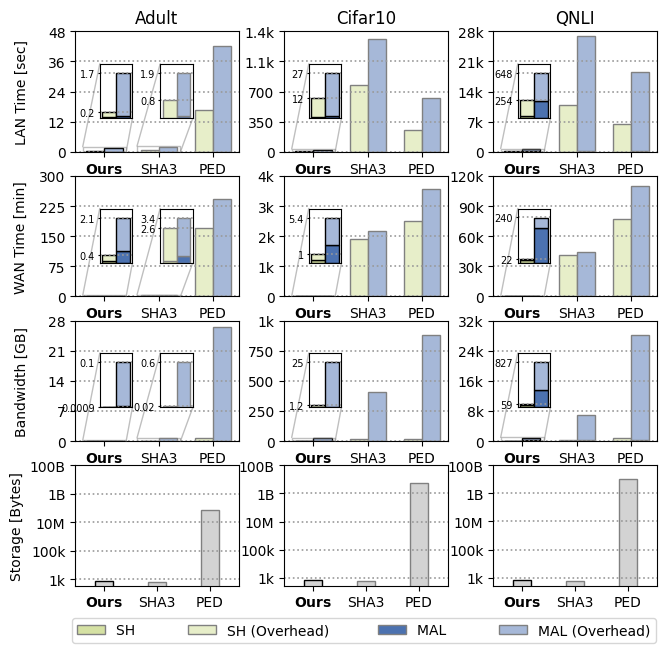

,suite_name,run,host_idx,exp_name,mpc.script_name,mpc.protocol_setup,mpc.domain,mpc.script_args.dataset,network_type,mpc_type,...,signature_train,signature_modelowner,signature_computer_train,signature_computer_inference,identity_train,identity_modelowner,identity_computer_train,identity_computer_inference,storage_train,storage_inference
0,inference_3pc,1,0,mal,inference,sy-rep-ring-party,ring_split,adult,lan,mal,...,192,64,64,64,96,32,96,96,416,608
1,inference_3pc,1,0,sh,inference,semi_honest_3,ring_split,adult,lan,sh,...,192,64,64,64,96,32,96,96,416,608
2,inference_3pc,1,1,mal,inference,sy-rep-ring-party,ring_split,adult,lan,mal,...,192,64,64,64,96,32,96,96,416,608
3,inference_3pc,1,1,sh,inference,semi_honest_3,ring_split,adult,lan,sh,...,192,64,64,64,96,32,96,96,416,608
4,inference_3pc,1,2,mal,inference,sy-rep-ring-party,ring_split,adult,lan,mal,...,192,64,64,64,96,32,96,96,416,608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,inference_3pc_bert_wan,1,1,wan,inference,semi_honest_3,ring_split,glue_qnli_bert,wan,sh,...,192,64,64,64,96,32,96,96,496,720
140,inference_3pc_bert_wan,1,2,wan,inference,semi_honest_3,ring_split,glue_qnli_bert,wan,sh,...,192,64,64,64,96,32,96,96,496,720
141,inference_3pc_bert_wan,7,0,wan,inference,sy-rep-ring-party,ring_split,glue_qnli_bert,wan,mal,...,192,64,64,64,96,32,96,96,496,720
142,inference_3pc_bert_wan,7,1,wan,inference,sy-rep-ring-party,ring_split,glue_qnli_bert,wan,mal,...,192,64,64,64,96,32,96,96,496,720


---

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results
/Users/hidde/PhD/auditing/arc/doe-suite-results


#### >> AWS Results

Replacing suite id map in super etl design: {'audit_fairness': 1723128427}
Filtering our pipelines: {'raw', 'mnist'}


/Users/hidde/PhD/auditing/arc/doe-suite/doespy/doespy/etl/etl_base.py:180: UserWarning: skip executing pipeline=compare_relatedwork_linear because no experiment data available
  warnings.warn(f"skip executing pipeline={pipeline_name} because no experiment data available")


> **does not exist yet**

---

In [17]:

for source in ["Paper","AWS"]:
    output(source, "inference", "compare_relatedwork_linear")




### Auditing
The inference experiments use the MP-SPDZ scripts for auditing defined in [scripts](scripts), starting with `audit_`.
The results are postprocessed using the ETL pipeline defined in [audit.yml](doe-suite-config/super_etl/audit.yml).

15:04 start

The following experiments are available to run:
<details>
    <summary>Available Suites</summary>

| Suite                                                                               | Description                                                        | Est. Duration |
|-------------------------------------------------------------------------------------|--------------------------------------------------------------------|---------------|
| [audit_robustness](doe-suite-config/designs/audit_robustness.yml)                   | Robustness function (Sec. 5.1) for Adult, MNIST and CIFAR-10 (LAN) | 2h            |
| [audit_robustness_wan](doe-suite-config/designs/audit_robustness_wan.yml)           | Robustness function (Sec. 5.1) for Adult, MNIST and CIFAR-10 (WAN) | 6h            |
| [audit_knnshapley](doe-suite-config/designs/audit_knnshapley.yml)                   | KNNShapley function (Sec. 5.2) for Adult, MNIST and CIFAR-10 (LAN) | 6h            |
| [audit_knnshapley_wan](doe-suite-config/designs/audit_knnshapley_wan.yml)           | KNNShapley function (Sec. 5.2) for Adult, MNIST and CIFAR-10 (WAN) | 17h           |
| [audit_fairness](doe-suite-config/designs/audit_fairness.yml)                       | Fairness function (Sec 5.1) for Adult, MNIST, and CIFAR-10 (LAN)   | 30m           |
| [audit_fairness_wan](doe-suite-config/designs/audit_fairness_wan.yml)               | Fairness function (Sec 5.1) for Adult, MNIST, and CIFAR-10 (WAN)   | 2h40m         |
| [audit_shap](doe-suite-config/designs/audit_shap.yml)                               | SHAP function (Sec. 5.3) for Adult, MNIST, and CIFAR-10 (LAN)      | 2h            |
| [audit_shap_wan](doe-suite-config/designs/audit_shap_wan.yml)                       | SHAP function (Sec. 5.3) for Adult, MNIST, and CIFAR-10 (WAN)      | 8h            |
| [audit_knnshapley_bert](doe-suite-config/designs/audit_knnshapley_bert.yml)         | KNNShapley function (Sec. 5.2) for QNLI (Semi-honest, LAN)         | 4h            |
| [audit_knnshapley_bert_mal](doe-suite-config/designs/audit_knnshapley_bert_mal.yml) | KNNShapley function (Sec. 5.2) for QNLI (Malicious, LAN)           | 6h            |
| [audit_knnshapley_bert_wan](doe-suite-config/designs/audit_knnshapley_bert_wan.yml) | KNNShapley function (Sec. 5.2) for QNLI (Semi-honest, WAN)         | 2h            |

</details>


In [13]:
suite_id = int(time())
suite_name="<<SUITE_NAME>>"

# Uncomment to run inline
# !cd doe-suite-config && ansible-playbook ../doe-suite/src/experiment-suite.yml -e "suite={suite_name} id=new epoch={suite_id} expfilter=sh"
# clear_output()
# print("Output cleared for conciceness")

copy_text_button(f"make run suite={suite_name} id=new")

Experiment command (run in doe-suite dir): `make run suite=<<SUITE_NAME>> id=new`


Box(children=(Button(description='Copy Command', icon='copy', style=ButtonStyle()), Output(layout=Layout(displ…

### Plots

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready
/Users/hidde/PhD/auditing/arc/doe-suite-results-cameraready


#### >> Paper Results

Filtering our pipelines: {'mnist'}


processing runs of experiment audit_robustness_3pc: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 36.02it/s]
processing runs of experiment audit_robustness_3pc_wan: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 36.88it/s]
processing runs of experiment audit_sample_knnshapley: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 25.86it/s]
processing runs of experiment audit_sample_knnshapley_wan: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 26.48it/s]
processing runs of experiment audit_fairness_3pc: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 3

Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_name', 'mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['audit_fairness', 'audit_robustness', 'audit_prediction_shap', 'audit_sample_knnshapley'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc_type': ['sh', 'mal'], 'host_idx': [0], 'mpc.protocol_setup': ['semi_honest_3', 'sy-rep-ring-party'], 'mpc.script_args.round_nearest': [False], 'mpc.script_args.dataset': ['adult', 'cifar_alexnet', 'glue_qnli_bert'], 'mpc.domain': ['ring_split'], 'network_type': ['lan', 'wan']}, 'plot_cols': ['host_idx', 'mpc.script_name', 'mpc.script_args.dataset', 'network_type'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#d5e1a3', 'edgecolor': 'grey'}, 'filter': {'mpc_type': ['sh'], '$bar_part_col$': ['mpc_time_s', 'globa

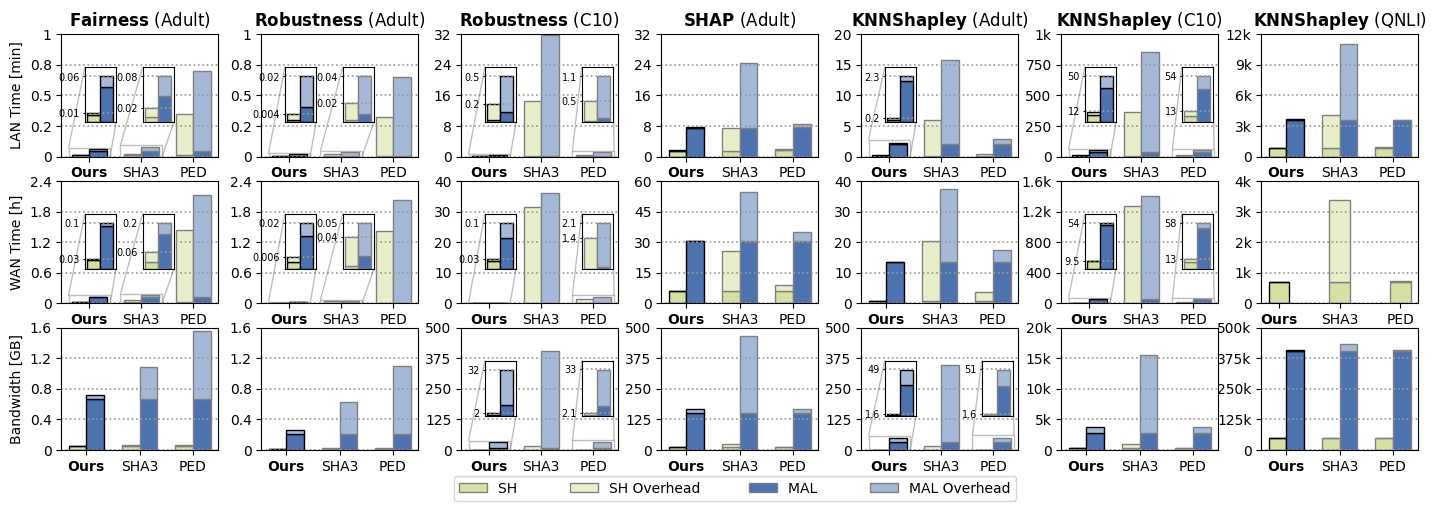

,suite_name,run,host_idx,exp_name,mpc.script_name,mpc_type,network_type,mpc.protocol_setup,mpc.domain,mpc.script_args.dataset,consistency_args.type,mpc_time_s,auditing_overhead_s,auditing_overhead_bytes,global_data_sent_bytes,n_rounds
0,audit_fairness,1,0,audit_fairness_3pc,audit_fairness,sh,lan,semi_honest_3,ring_split,adult,sha3s,0.521717,0.959701,15796590,4.797955e+07,48662
1,audit_fairness,1,1,audit_fairness_3pc,audit_fairness,sh,lan,semi_honest_3,ring_split,adult,sha3s,0.521365,0.959700,15796590,4.797955e+07,48568
2,audit_fairness,1,2,audit_fairness_3pc,audit_fairness,sh,lan,semi_honest_3,ring_split,adult,sha3s,0.521787,0.959701,15796590,4.797955e+07,48662
3,audit_fairness,3,0,audit_fairness_3pc,audit_fairness,sh,lan,semi_honest_3,ring_split,adult,cerebro,0.523981,20.494855,20636466,4.797955e+07,48662
4,audit_fairness,3,1,audit_fairness_3pc,audit_fairness,sh,lan,semi_honest_3,ring_split,adult,cerebro,0.523636,20.495391,20636466,4.797955e+07,48568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,audit_shap_wan,9,1,audit_shap_wan,audit_prediction_shap,mal,wan,sy-rep-ring-party,ring_split,adult,cerebro,110664.670200,14532.338098,17307370032,1.525852e+11,2600157
311,audit_shap_wan,9,2,audit_shap_wan,audit_prediction_shap,mal,wan,sy-rep-ring-party,ring_split,adult,cerebro,110664.670700,14532.335602,17307370032,1.525852e+11,2600158
312,audit_shap_wan,11,0,audit_shap_wan,audit_prediction_shap,mal,wan,sy-rep-ring-party,ring_split,adult,pc,110684.839800,112.566969,15641754206,1.525852e+11,2600158
313,audit_shap_wan,11,1,audit_shap_wan,audit_prediction_shap,mal,wan,sy-rep-ring-party,ring_split,adult,pc,110684.800200,112.345216,15641754206,1.525852e+11,2600157


---

env: DOES_RESULTS_DIR=/Users/hidde/PhD/auditing/arc/doe-suite-results
/Users/hidde/PhD/auditing/arc/doe-suite-results


#### >> AWS Results

Replacing suite id map in super etl design: {'audit_fairness': 1723128427}
Filtering our pipelines: {'mnist'}


/Users/hidde/PhD/auditing/arc/doe-suite/doespy/doespy/etl/etl_base.py:180: UserWarning: skip executing pipeline=compare_relatedwork because no experiment data available
  warnings.warn(f"skip executing pipeline={pipeline_name} because no experiment data available")


> **does not exist yet**

---

In [18]:

for source in ["Paper","AWS"]:
    output(source, "audit", "compare_relatedwork")
    

### Storage Overhead
We compute the storage costs for Fig. 4 & Fig. 5 using [storage.ipynb](notebooks/storage.ipynb)
which stores the result in a csv in `doe-suite-results` which is loaded by the pipeline.


## MNIST (Appendix, Extended Version)
The MNIST experiments are part of the training, inference and auditing suites, but are displayed in a separate plot in the appendix of the extended version due to space reasons. Therefore, we have a separate ETL pipeline for these results.

In [ ]:
suite_id = int(time())
suite_name="<<SUITE_NAME>>"

# Uncomment to run inline
# !cd doe-suite-config && ansible-playbook ../doe-suite/src/experiment-suite.yml -e "suite={suite_name} id=new epoch={suite_id} expfilter=sh"
# clear_output()
# print("Output cleared for conciceness")

copy_text_button(f"make run suite={suite_name} id=new")

In [ ]:
for source in ["Paper","AWS"]:
    output(source, "train", "mnist")

In [ ]:
for source in ["Paper","AWS"]:
    output(source, "inference", "mnist")

In [ ]:
for source in ["Paper","AWS"]:
    output(source, "audit", "mnist")